**Stationarity Test**

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500


**Augmented Dickey-Fuller (ADF) Test**

In [6]:
from statsmodels.tsa.stattools import adfuller

# Performed the Augmented Dickey Fuller Test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results: ')
print(f'ADF Statistics: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print("-------------------")
print(f'Critical Values: ')
for key, value in adf_test[4].items():
  print(f'{key}: {round(value, 3)}')

ADF Test Results: 
ADF Statistics: -1.064
p-value: 0.729
-------------------
Critical Values: 
1%: -3.454
5%: -2.872
10%: -2.572




*   If the p-value is small (typically < 0.05), you reject the null hypothesis and conclude that the series is likely stationary.
*   If the p-value is large (typically ≥ 0.05), you fail to reject the null hypothesis, suggesting that the series is non-stationary.


**In this case, p-value = 0.729, which is quite large, so we fail to reject the null hypothesis. This suggests that your time series does not exhibit stationarity, and it is likely non-stationary.**

**Based on the ADF test results, with a high p-value (0.729) and an ADF
statistic (-1.064) not below the critical values, your time series is likely non-stationary**

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

In [10]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # regression = 'c' for constant (level stationarity) & 'ct' for trend

print('KPSS Test Results: ')
print(f'KPSS Statistic: {round(kpss_test[0], 3)}')
print(f'p-value: {round(kpss_test[1], 3)}')
print('-------------------')
print(f'Critical Value')
for key, value in kpss_test[3].items():
  print(f'{key} : {value}')


KPSS Test Results: 
KPSS Statistic: 0.193
p-value: 0.019
-------------------
Critical Value
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216




*   The null hypothesis is that the time series is stationary (specifically trend-stationary, i.e., stationary around a deterministic trend).
*   A low p-value (typically < 0.05) indicates that the null hypothesis is rejected, meaning the time series is non-stationary.
*   A high p-value (typically ≥ 0.05) means you fail to reject the null hypothesis, suggesting the series is stationary.

**Since your p-value = 0.019, which is less than 0.05, we reject the null hypothesis of stationarity. This suggests that your time series is likely non-stationary in terms of trend-stationarity.**




**Conclusion**:
* The KPSS test result suggests that the series is non-stationary with respect to its trend. The rejection of the null hypothesis (stationarity) combined with the KPSS statistic being larger than the critical values indicates that the series likely has a unit root (is non-stationary) and is not stationary around a deterministic trend.

**Kolmogorov-Smirnov (K-S)**

In [42]:
from scipy.stats import ks_2samp

# Generation synthetic data for demonstration
np.random.seed(0)
n=500

# Strictly stationary series: normal distributed random noise
strictly_stationary_series = np.random.normal(0, 1, n)

#  Non - Strictly stationary series: changing variance
non_strictly_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

In [43]:
# Function to split the series into two halves and perform the K-S Test
def ks_test_stationarity(series):
  split = len(series)//2
  series_first_half = series[:split]
  series_second_half = series[split:]
  stats, p_value = ks_2samp(series_first_half, series_second_half)

  return stats, p_value

In [44]:
# Perform the K-S Test on Strictly Stationary Series
stats_strictly_stationary, p_value_strictly_stationary = ks_test_stationarity(strictly_stationary_series)

# Perform the K-S Test on Non-Strictly Stationary Series
stats_non_strictly_stationary, p_value_non_strictly_stationary = ks_test_stationarity(non_strictly_stationary_series)

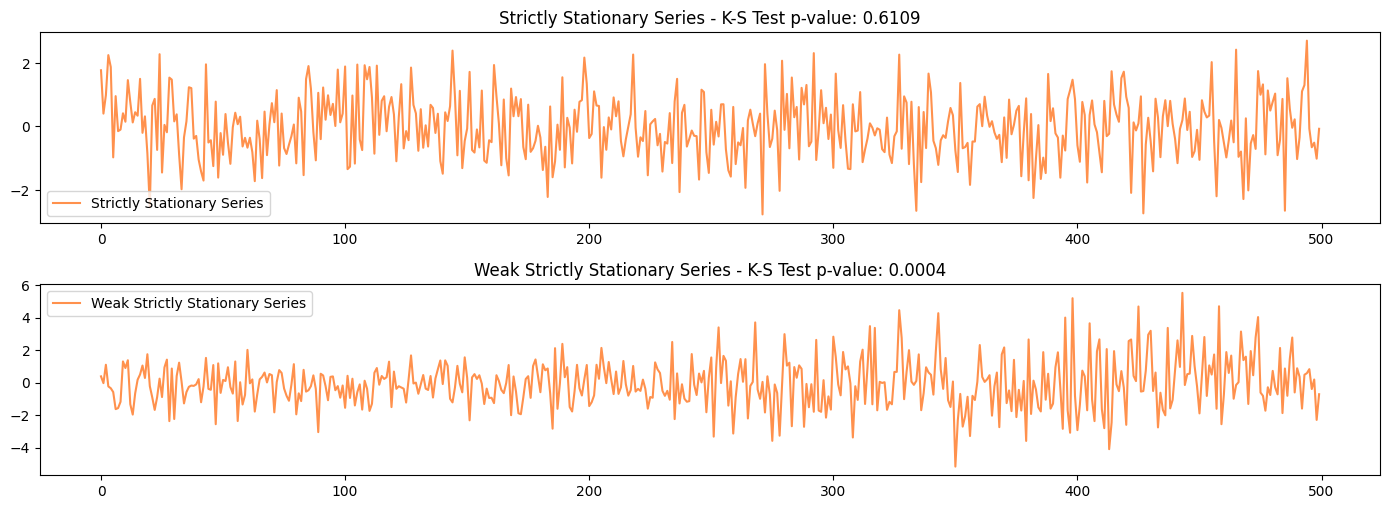

In [45]:
# Plotting the series
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(strictly_stationary_series, label='Strictly Stationary Series', color='#FF914D')
plt.title(f'Strictly Stationary Series - K-S Test p-value: {round(p_value_strictly_stationary, 4)}')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(non_strictly_stationary_series, label='Weak Strictly Stationary Series', color='#FF914D')
plt.title(f'Weak Strictly Stationary Series - K-S Test p-value: {round(p_value_non_strictly_stationary, 4)}')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [46]:
print(f'Strictly Stationary Series - K-S Test Statistics: {stats_strictly_stationary} & p-value: {round(p_value_strictly_stationary, 4)}')
print(f'Weak Stricly Stationary Series - K-S Test Statistics: {stats_non_strictly_stationary} & p-value: {round(p_value_non_strictly_stationary, 4)}')

Strictly Stationary Series - K-S Test Statistics: 0.068 & p-value: 0.6109
Weak Stricly Stationary Series - K-S Test Statistics: 0.184 & p-value: 0.0004


**Conclusion**:
* The strictly stationary series seems to adhere to the stationarity assumption, as the p-value is large and suggests no significant deviation from strict stationarity.
* The weakly stationary series, however, does not appear to be weakly stationary, as the small p-value strongly rejects the null hypothesis of weak stationarity.